# Entrenamiento de los modelos

Para ello realizamos una validación cruzada de 5 pasos con los cuatro métodos que se van a usar K-NN, SVM, Naive Bayes, Random forests. Previamente, se habían generado los csv con los conjuntos test y validación que ya han sido procesados previamente.

Primero, creamos las funciones que se encargan de entrenar entrenar los modelos con los distintos métodos especificos. Es importante tener en cuenta que los conjuntos que tenemos para el entrenamiento contienen una cantidad de features distinta. Por lo que no será el mismo entrenamiento para conjuntos a los que se les ha realizado distintas transformaciones.

En este caso, implementamos la función de K-Nearest Neighbors. Para esto necesitamos definir el hiperparámetro K. Tras consultarlo con Google Gemini y leer el foro r/datascience, hemos determinado que la K se obtiene por experimentación. Si bien es cierto que no hay que probar todos los valores de K posibles, ya que se recomienda usar solo los impares para que exista una preferencia arbitraria, con probar con los valores de K hasta la raíz cuadrada de N (tamaño del conjunto de entrenamiento) es suficiente.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
import os

def KNN(train_data, test_data, model_name: str):
    # Para separar el target del resto de features, asumimos que la última columna es el target
    X_train = train_data.iloc[:, :-1].astype(float)
    y_train = train_data.iloc[:, -1].astype(int)
    X_test = test_data.iloc[:, :-1].astype(float)
    y_test = test_data.iloc[:, -1].astype(int)

    best_accuracy = 0.0
    best_k = 1
    best_model = None
    best_y_pred = None
    best_y_prob = None
    
    # Entrenamos el modelo KNN con k=1+2i (números impares) hasta la raíz cuadrada del número de muestras
    for k in range(1, int(len(X_train)**0.5), 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_model = knn
            best_y_pred = y_pred
            best_y_prob = knn.predict_proba(X_test)
        print(f"KNN con k={k}: Precisión = {accuracy:.4f}")

    # Guardamos el mejor modelo obtenido
    print(f"Mejor modelo: k={best_k}, Precisión = {best_accuracy:.4f}")
    
    # Guardamos el modelo en formato pickle
    os.makedirs("cross_validation_models", exist_ok=True)
    model_path = f"cross_validation_models/{model_name}.pkl"
    joblib.dump(best_model, model_path)

    return y_test.to_numpy(), best_y_pred, best_y_prob

A continuacón, implementamos el resto de métodos, que siguen una estructura similar.

In [25]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import os

def SVM(train_data, test_data, model_name: str):
    # Para separar el target del resto de features, asumimos que la última columna es el target
    X_train = train_data.iloc[:, :-1].astype(float)
    y_train = train_data.iloc[:, -1].astype(int)
    X_test = test_data.iloc[:, :-1].astype(float)
    y_test = test_data.iloc[:, -1].astype(int)

    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM: Precisión = {accuracy:.4f}")

    # Guardamos el modelo en formato pickle
    os.makedirs("cross_validation_models", exist_ok=True)
    model_path = f"cross_validation_models/{model_name}.pkl"
    joblib.dump(svm, model_path)

    return y_test.to_numpy(), y_pred, y_prob

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import os


def RF(train_data, test_data, model_name: str):
    # Para separar el target del resto de features, asumimos que la última columna es el target
    X_train = train_data.iloc[:, :-1].astype(float)
    y_train = train_data.iloc[:, -1].astype(int)
    X_test = test_data.iloc[:, :-1].astype(float)
    y_test = test_data.iloc[:, -1].astype(int)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest: Precisión = {accuracy:.4f}")
    
    # Guardamos el modelo en formato pickle
    os.makedirs("cross_validation_models", exist_ok=True)
    model_path = f"cross_validation_models/{model_name}.pkl"
    joblib.dump(rf, model_path)

    return y_test.to_numpy(), y_pred, y_prob

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib
import os

def NB(train_data, test_data, model_name: str):
    # Para separar el target del resto de features, asumimos que la última columna es el target
    X_train = train_data.iloc[:, :-1].astype(float)
    y_train = train_data.iloc[:, -1].astype(int)
    X_test = test_data.iloc[:, :-1].astype(float)
    y_test = test_data.iloc[:, -1].astype(int)

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    y_prob = nb.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Naive Bayes: Precisión = {accuracy:.4f}")
    
    # Guardamos el modelo en formato pickle
    os.makedirs("cross_validation_models", exist_ok=True)
    model_path = f"cross_validation_models/{model_name}.pkl"
    joblib.dump(nb, model_path)

    return y_test.to_numpy(), y_pred, y_prob

Naive Bayes: Precisión = 0.9333
Clases únicas en y_test: [0 1 2]
Clases únicas en y_pred: [0 1 2]
Forma de y_prob: (30, 3)


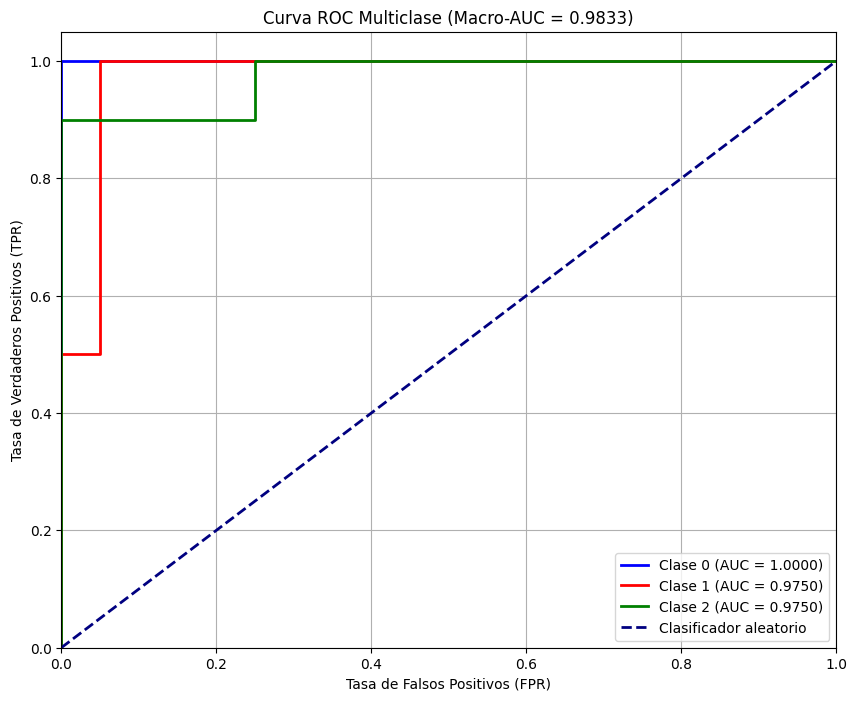

In [ ]:
import pandas as pd

# Creamos unos diccionarios para identificar los distintos datos de la validación cruzada
transformations = {
    "N" : "norm",
    "O" : "original",
    "S" : "std",
}

methods = {
    "K" : KNN,
    "S" : SVM,
    "R" : RF,
    "N" : NB,
}

def train_model(method: str, iteration: int, transformation_type: str, PCA: int): 
    # Obtenemos los conjuntos de entrenamiento y testing de la carpeta cross_validation_data en función de los parámetros
    # Ejemplo: cross_validation_data/test1_norm_PCA80.csv o cross_validation_data/training1_std.csv
    transformation_str = transformations[transformation_type]

    # Construimos los nombres de los archivos de entrenamiento y prueba
    if PCA > 0:
        try:
            test_file = f"cross_validation_data/test{iteration}_{transformation_str}_PCA{PCA}.csv"
            train_file = f"cross_validation_data/training{iteration}_{transformation_str}_PCA{PCA}.csv"
            model_name = f"{methods[method].__name__}_{transformation_str}_PCA{PCA}_{iteration}"
        except FileNotFoundError:
            print(f"Archivos con PCA{PCA} no encontrados, intentando sin PCA...")
            return
    else :
        try:
            test_file = f"cross_validation_data/test{iteration}_{transformation_str}.csv"
            train_file = f"cross_validation_data/training{iteration}_{transformation_str}.csv"
            model_name = f"{methods[method].__name__}_{transformation_str}_{iteration}"
        except FileNotFoundError:
            print(f"Archivos sin PCA no encontrados.")
            return

    # Guardamos los datos de los archivos en dos dataframes de pandas
    # pd.read_csv ya interpreta la primera fila como header automáticamente
    df_train = pd.read_csv(train_file)
    df_test = pd.read_csv(test_file)
    
    # Llamamos a la función de entrenamiento correspondiente según el método
    y_test, y_pred, y_prob = methods[method](df_train, df_test, model_name)
    return y_test, y_pred, y_prob, model_name